# <center> Effects of Age, Gender and Day of the week on Duration and Distance and how to convert customers into subscribers in Fordbike sharing 

# Investigation Overview
In this investigation, I wanted to look at the characteristics of bike-sharing activities that could be used to improve their marketing strategy. The main focus was on Age, Gender, Day of the week, Duration and Distance, and how to convert customers into subscribers.

## Dataset Overview
The data consisted of data of member that contains approximately 174952 members. The attributes include the members birth date, member gender, duration, locations of the ride (start and end station coordinates and start and end station ID), day of the weak of the ride, as well as additional measurements such as bike ID, user type(being a subscriber of or a customer). 8,460 data points were removed from the analysis due to inconsistencies or missing information.

### What is the structure of your dataset?

There are 174952 bike-sharing activity in the dataset with 16 features (members birth date, members gender, duration, locations of the ride (start and end station coordinates and start and end station ID), day of the weak of the ride, as well as additional measurements such as bike ID, user type(being a subscriber of or a customer). Most variables are numeric in nature, but the variables end and start staion, member type and member geder are categorical.


### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for predicting the behavior of the the members in the dataset through the week.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that Age, Gender and Day of the week on Duration and Distance will have the strongest effect: the larger the duration, the higher the distince and high potential that the member can conver to be a subscriber.

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math
from math import radians, cos, sin, asin, sqrt
pd.set_option("display.max.columns", None)
%matplotlib inline

In [2]:
# import and read data
df = pd.read_csv('D:/python/Udacity/Visualization project/201902-fordgobike-tripdata.csv')
print(df.shape)
df.head(10)

(183412, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


## Intial investigation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [5]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

I decided to drop the rows that contain null values which might affect my decision

In [6]:
df=df.dropna(axis=0)

In [7]:
#double check the results
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

# Preliminary Wrangling

## calculation of the distance of the ride
I used the reference provided in this <a href="https://stackoverflow.com/questions/56079085/how-do-i-overcome-the-typeerror-cannot-convert-the-series-to-class-float-er">link</a> to calculate the distance between the start and end coordinates 

In [8]:
# calculation the distance
# https://stackoverflow.com/questions/56079085/how-do-i-overcome-the-typeerror-cannot-convert-the-series-to-class-float-er
lon1 = df['start_station_longitude'].map(radians)
lat1 = df['start_station_latitude'].map(radians)
lon2 = df['end_station_longitude'].map(radians)
lat2 = df['end_station_latitude'].map(radians)
# haversine formula
dlon = lon2 - lon1
dlat = lat2 - lat1


a = (dlat/2).apply(lambda x : sin(x)) ** 2  + lat1.apply(lambda x : cos(x)) * lat2.apply(lambda x:cos(x))* (dlon/2).apply(lambda x : sin(x)) ** 2
c = 2 * a.apply(lambda x : asin(sqrt(x)))
results = 3959.0 * c
df['distance']=results

# investigate the distance column
df['distance'].describe()

count    174952.000000
mean          1.050213
std           0.681659
min           0.000000
25%           0.565758
50%           0.888510
75%           1.382021
max          43.168847
Name: distance, dtype: float64

I noticed that the max value is 43 hr which is an outlier. thus, I decided to remove it

In [9]:
df=df[df['distance']<=40]
df['distance'].describe()

count    174951.000000
mean          1.049972
std           0.674183
min           0.000000
25%           0.565745
50%           0.888510
75%           1.382021
max           9.739945
Name: distance, dtype: float64

## Timestamp data wrangling
I used the reference provided in this <a href="https://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.to_datetime.html">link</a> to convert the time columns into a time stamp

In [10]:
df['start_time'] = pd.to_datetime(df.start_time)
df['end_time'] = pd.to_datetime(df.end_time)

I decided to creat a column for the duration in hours to make easier to understand

In [11]:
df['duration_hr']=df['duration_sec']/3600
df['duration_hr'].describe()

count    174951.000000
mean          0.195546
std           0.456151
min           0.016944
25%           0.089722
50%           0.141667
75%           0.219167
max          23.485556
Name: duration_hr, dtype: float64

I decided to create a column for month, day of the week, and the season (winter, summer, fall, and spring) to investigate the time data if they have an influence on bike-sharing activity

In [12]:
#create a colmn for Months
df['month'] = pd.DatetimeIndex(df['start_time']).month

# I converted the month from int to its corresponding name to make it easier to read`
month_look_up = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
df['month'] = df['month'].apply(lambda x: month_look_up[x])

In [13]:
#create a colmn for day of the week
df['day'] = pd.DatetimeIndex(df['start_time']).dayofweek

# converted the numbers to a date name to make it easiier to read
day_look_up = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['day'] = df['day'].apply(lambda x: day_look_up[x])

In [14]:
#create a colmn for day of the week
df['season'] = pd.DatetimeIndex(df['start_time']).month

# converted the numbers to a date name to make it easiier to read
seasons_look_up = {1: 'winter', 2: 'winter', 3: 'spring', 4: 'spring', 5: 'spring', 6: 'summer', 7: 'summer', 8: 'summer', 9: 'autumn', 10: 'autumn', 11: 'autumn', 12: 'winter'}
df['season'] = df['season'].apply(lambda x: seasons_look_up[x])

In [15]:
# the data only in february (winter) so I decided to stop working with these columns
df['season'].value_counts()

winter    174951
Name: season, dtype: int64

In [16]:
df['month'].value_counts()

Feb    174951
Name: month, dtype: int64

I decided to stop working in month and season columns, the dataset is only in February, it would be much more helpful if the data was in the whole year to give me a strong clew on the activity of bike-sharing.

In [17]:
day_classes = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
Dclasses = pd.api.types.CategoricalDtype(ordered=True, categories=day_classes)
df['day'] = df['day'].astype(Dclasses);

## Data wrangling for the age and the birth date of the members
I used the reference provided in this <a href="https://stackoverflow.com/questions/49382207/how-to-map-numeric-data-into-categories-bins-in-pandas-dataframe">link</a> to group the ages of the members to make it easier to investigate

In [18]:
# First, getting the ages of the members and convert it to integer
df['age'] = 2021 - df['member_birth_year']
df['age'] = df['age'].astype(int)

# investigate the ages of the members
df['age'].describe()

count    174951.000000
mean         36.196867
std          10.118760
min          20.000000
25%          29.000000
50%          34.000000
75%          41.000000
max         143.000000
Name: age, dtype: float64

In [19]:
# grouping the ages to ranges of generations to make it easier to investigate
bins = [ 10, 20, 30, 40, 50, 60, 70, 80, np.inf]
names = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '+80']

df['AgeRange'] = pd.cut(df['age'], bins, labels=names)

# investigate the different generations 
df['AgeRange'].value_counts()

30-40    72647
20-30    56626
40-50    27787
50-60    12897
60-70     4108
70-80      649
+80        203
10-20       34
Name: AgeRange, dtype: int64

# Data visulazation

## Univariate Exploration

I started with visualizing the ratio of customers to subscribers using a pie chart

### how many subscribers in comparison with customers in the dataset?

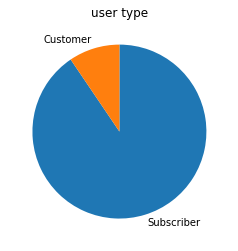

In [20]:
sorted_counts = df['user_type'].value_counts()
sorted_counts
base_color = sb.color_palette()[0]
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);
plt.title('user type');

almost 90% of the members are subscribers, the goal is to keep the subscribers and encourage customers to convert into subscribers. Further, I want to analyze if these results change when compared to different days and gender and I want to study the duration and distance in comparison to member type.

## What is the genders count of the members of the dataset?

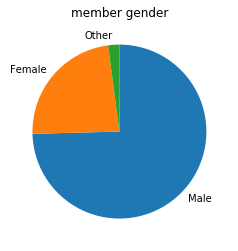

In [21]:
sorted_counts = df['member_gender'].value_counts()
sorted_counts
base_color = sb.color_palette()[0]
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);
plt.title('member gender');

almost 75% of the members are male. Further, I want to analyze if these results change when compared to different days and member type and I want to study the duration and distance in comparison to member gender.

### What generation share Fordbike the most?

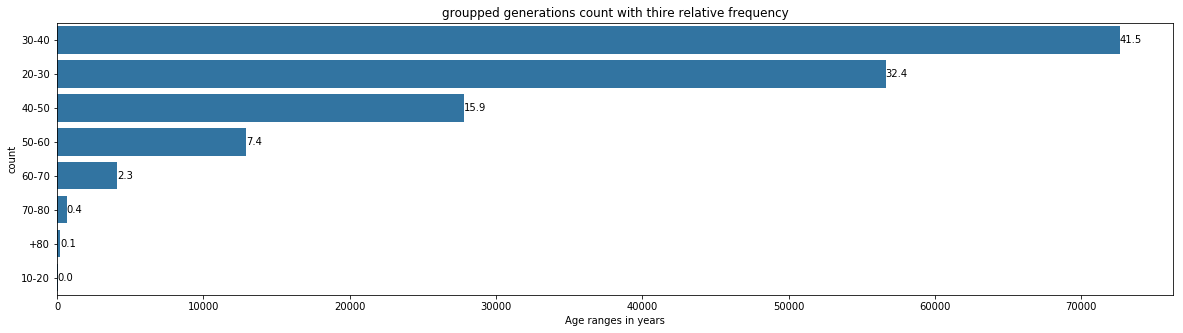

In [22]:
# Count the frequency of unique values in the `type` column of user_types dataframe.
# By default, returns the decreasing order of the frequency.
plt.figure(figsize = [20, 5])

type_counts = df['AgeRange'].value_counts()
type_counts

# Get the unique values of the `type` column, in the decreasing order of the frequency.
type_order = type_counts.index
type_order

n_type = df['AgeRange'].value_counts().sum()
n_type
# Return the highest frequency in the `type` column
max_type_count = type_counts[0]

# Return the maximum proportion, or in other words,
# compute the length of the longest bar in terms of the proportion
max_prop = max_type_count / n_type


base_color = sb.color_palette()[0]
sb.countplot(data=df, y='AgeRange', color=base_color, order=type_order);
plt.title('groupped generations count with thire relative frequency');
plt.xlabel('Age ranges in years');
plt.ylabel('count');

# Logic to print the proportion text on the bars
for i in range (type_counts.shape[0]):
    # Remember, type_counts contains the frequency of unique values in the `type` column in decreasing order.
    count = type_counts[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}'.format(100*count/n_type)
    # Print the string value on the bar.
    # Read more about the arguments of text() function [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html)
    plt.text(count+1, i, pct_string, va='center')


Most members are people between the age of 30 and 40. and the lowest in the kids between 10 and 20. It seems as if members share bikes for reasons of transportation to go to their work more than they use it as a sport

### How many trips made per  each day of the week?

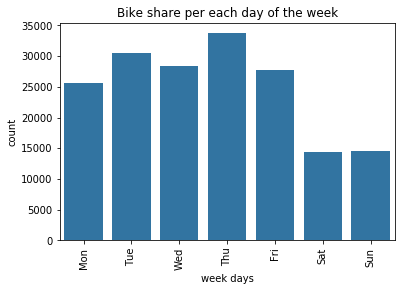

In [23]:
base_color = sb.color_palette()[0]
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sb.countplot(data=df, x='day', color=base_color, order=day_order);
plt.xticks(rotation=90);
plt.title('Bike share per each day of the week');
plt.xlabel('week days');
plt.ylabel('count');

the graph shows a decline in bike use on the weekends which emphasise my findings above that members share bikes more often for transportation.

## Bivariate Exploration

### Is there any relation between member age and the duration of the trip?

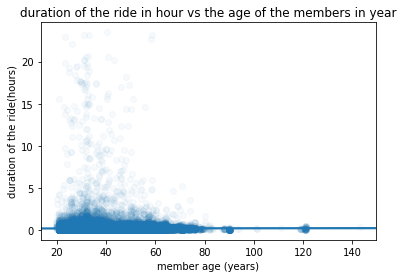

In [24]:
sb.regplot(data = df, x = 'age', y = 'duration_hr', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/30});
plt.title('duration of the ride in hour vs the age of the members in year');
plt.xlabel('member age (years)');
plt.ylabel('duration of the ride(hours)');

the graph is not clear. the graph shows a condensation of the durations of the ride between the ages of 20 and 80 ranges up to 2.5 hours. Some individuals between the ages of 20 and 40 with a duration up to 20 hours. Moreover, it is weird to see an individual with an age up to 120. thus it requires more investigation as below

I used line graphs to take a clew on the standard deviation of each age to obtain a general idea of the duration and the distance for each age

In [25]:
# check the ranges of the age to determine the bins
df['age'].describe()

count    174951.000000
mean         36.196867
std          10.118760
min          20.000000
25%          29.000000
50%          34.000000
75%          41.000000
max         143.000000
Name: age, dtype: float64

In [26]:
bin_edges = np.arange(0, 140+10, 10)
bin_centers = bin_edges[:-1] + 0.1
# Cut the bin values into discrete intervals. Returns a Series object.
age_binned = pd.cut(df['age'], bin_edges, include_lowest = True)

### Do Fordbike expect a longer ride duration for older generation?

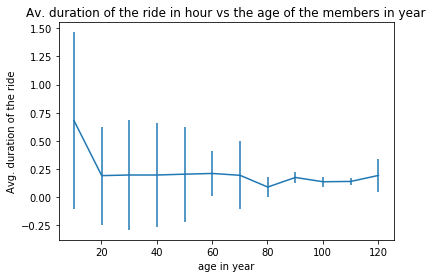

In [27]:
dur_mean = df['duration_hr'].groupby(age_binned).mean()
dur_std = df['duration_hr'].groupby(age_binned).std()

# Plot the summarized data
plt.errorbar(x=bin_centers, y=dur_mean, yerr=dur_std)
plt.ylabel('Avg. duration of the ride');
plt.xlabel('age in year');
plt.title('Av. duration of the ride in hour vs the age of the members in year');

the graph shows the highest  average duration for individuals below 20 years old and the highest stander deviation of duration for ages below 20
and consistent average duration for ages between 20 and 120 with a slight decline in duration for ages around 80

### Is there any relation between member age and the duration of the trip?

In [28]:
bin_edges = np.arange(0, 140+10, 10)
bin_centers = bin_edges[:-1] + 0.1
# Cut the bin values into discrete intervals. Returns a Series object.
distance_binned = pd.cut(df['age'], bin_edges, include_lowest = True)

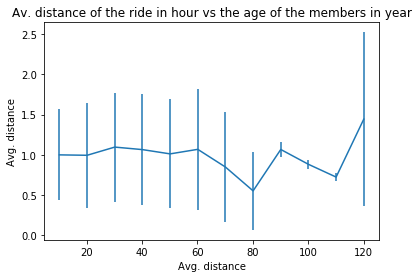

In [29]:
dest_mean = df['distance'].groupby(distance_binned).mean()
dest_std = df['distance'].groupby(distance_binned).std()

# Plot the summarized data
plt.errorbar(x=bin_centers, y=dest_mean, yerr=dest_std)
plt.ylabel('Avg. distance');
plt.xlabel('Avg. distance');
plt.title('Av. distance of the ride in hour vs the age of the members in year');

the graph shows the highest distance for individuals who are 120 years old. It is kind of weird that individuals who are 120 years old have the highest distance and the lowest duration. for these reasons I'll continue to investigate the data for individuals with trips with a distance ==0

In [30]:
df3=df[df['distance']==0]

In [31]:
start_end_station_check=df3['start_station_name']==df3['end_station_name']

In [32]:
start_end_station_check.value_counts()

True    3458
dtype: int64

I noticed that all the start and end stations are the same. Next, I'll investigate the duration VS age for these columns

In [33]:
df['duration_hr'].describe()

count    174951.000000
mean          0.195546
std           0.456151
min           0.016944
25%           0.089722
50%           0.141667
75%           0.219167
max          23.485556
Name: duration_hr, dtype: float64

In [34]:
df3['duration_hr'].describe()

count    3458.000000
mean        0.497185
std         1.194532
min         0.016944
25%         0.077778
50%         0.268194
75%         0.543333
max        20.536111
Name: duration_hr, dtype: float64

from the two cells above, I noticed that the dataset with a distance==0 have a higher mean than our original data

In [35]:
bin_edges = np.arange(0, 140+10, 10)
bin_centers = bin_edges[:-1] + 0.1
# Cut the bin values into discrete intervals. Returns a Series object.
age_binned3 = pd.cut(df3['age'], bin_edges, include_lowest = True)

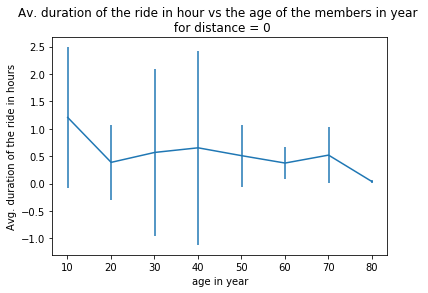

In [36]:
dur_mean3 = df3['duration_hr'].groupby(age_binned3).mean()
dur_std3 = df3['duration_hr'].groupby(age_binned3).std()

# Plot the summarized data
plt.errorbar(x=bin_centers, y=dur_mean3, yerr=dur_std3)
plt.ylabel('Avg. duration of the ride in hours');
plt.xlabel('age in year');
plt.title('Av. duration of the ride in hour vs the age of the members in year \n for distance = 0');

The graph shows a higher ride duration for zero distance, I wanted to check if there is a relation between the age and these values. At first, I thought there was an error in the Application or in the sharing process that older generations couldn't understand. but after this investigation, I realized that it seems as if the member took the bike and returned it to the same station. because the graph shows a higher ride duration than the previous graph with no respect to member age with a slight decline in duration for older generations

### what is the member types for members who take a bike and return it to the same station?

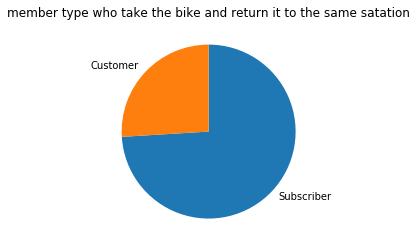

In [37]:
sorted_counts = df3['user_type'].value_counts()
sorted_counts
base_color = sb.color_palette()[0]
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);
plt.title('member type who take the bike and return it to the same satation');

it here there is a huge change in members type than the original data, the Customers here tend to rent a bike for a longer duration than usual which could be a high potential for FordBike to target them in more regularly to encourage them to convert into subscribers

In [38]:
age_classes = df['AgeRange'].value_counts().index
age_classes
# Returns the types for sedan_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html

Ageclasses = pd.api.types.CategoricalDtype(ordered=True, categories=age_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type
df['AgeRange'] = df['AgeRange'].astype(Ageclasses);


### What is the members types in each day of the week?

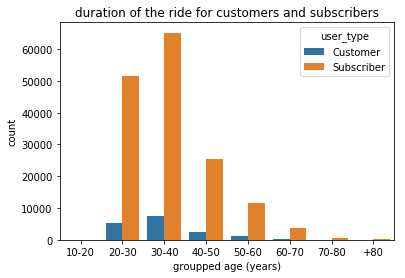

In [39]:
sb.countplot(data = df, x = 'AgeRange', hue = 'user_type');
plt.title('duration of the ride for customers and subscribers');
plt.xlabel('groupped age (years)');
plt.ylabel('count');

the graph shows the different distributions for the grouped generation with their user type which shows a very large difference between being a subscriber and a customer. but there is a kind of a fixed ratio between generation and being a customer or a subscriber

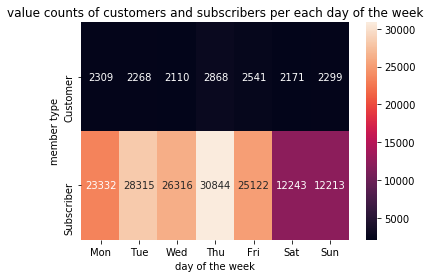

In [40]:
ct_counts = df.groupby(['user_type', 'day']).size()
# Use Series.reset_index() to convert a series into a dataframe object
ct_counts = ct_counts.reset_index(name='count')
# Use DataFrame.pivot() to rearrange the data, to have vehicle class on rows
ct_counts = ct_counts.pivot(index = 'user_type', columns = 'day', values = 'count')

"""Plot the heatmap"""
sb.heatmap(ct_counts, annot = True, fmt = 'd');
plt.title('value counts of customers and subscribers per each day of the week');
plt.xlabel('day of the week');
plt.ylabel('member type');

The heat map shows the count of member types through the weekdays. which shows the caount of each member in each day of the weak

## Multivariate Exploration

### Is there any obeservation for duration vs distance per each member type?

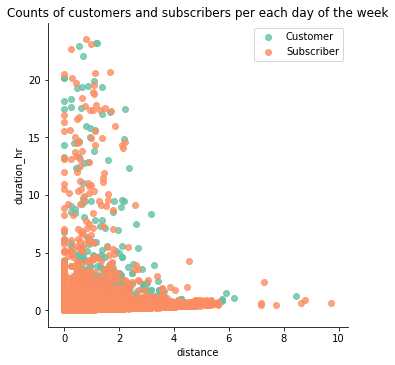

In [41]:
sb.lmplot( x="distance", y="duration_hr", data=df, fit_reg=False, hue='user_type', legend=False, palette="Set2")
 
# Move the legend to an empty part of the plot
plt.legend(loc='upper right')
plt.title('Counts of customers and subscribers per each day of the week');
plt.show()

Now, I'll plot each yser type in a scatter plot graph to obtain a full idea for their ride duration and distance

In [42]:
df_Sub=df[df['user_type']=='Subscriber']
df_Sub.shape

(158385, 23)

In [43]:
df_Cus=df[df['user_type']=='Customer']
df_Cus.shape

(16566, 23)

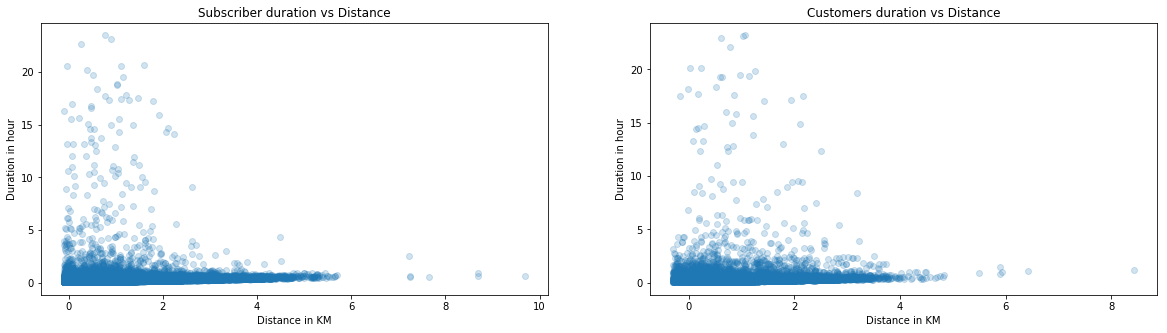

In [44]:
plt.figure(figsize = [20, 5])

# PLOT ON LEFT
plt.subplot(1, 2, 1)
sb.regplot(data = df_Sub, x = 'distance', y = 'duration_hr',fit_reg = False,x_jitter=0.1, scatter_kws={'alpha':1/5});
plt.title('Subscriber duration vs Distance');
plt.xlabel('Distance in KM');
plt.ylabel('Duration in hour');
##########################################
# PLOT ON RIGHT
plt.subplot(1, 2, 2)
sb.regplot(data = df_Cus, x = 'distance', y = 'duration_hr',fit_reg = False,x_jitter=0.3, scatter_kws={'alpha':1/5});
plt.title('Customers duration vs Distance');
plt.xlabel('Distance in KM');
plt.ylabel('Duration in hour');

in this graph, although the subscribers are the majority of our data, it is obvious that customers share bikes for longer duration and longer distances specially at distance > 2 to 6 KM

### What is the relation between distance and duration for members types in each day of the week?

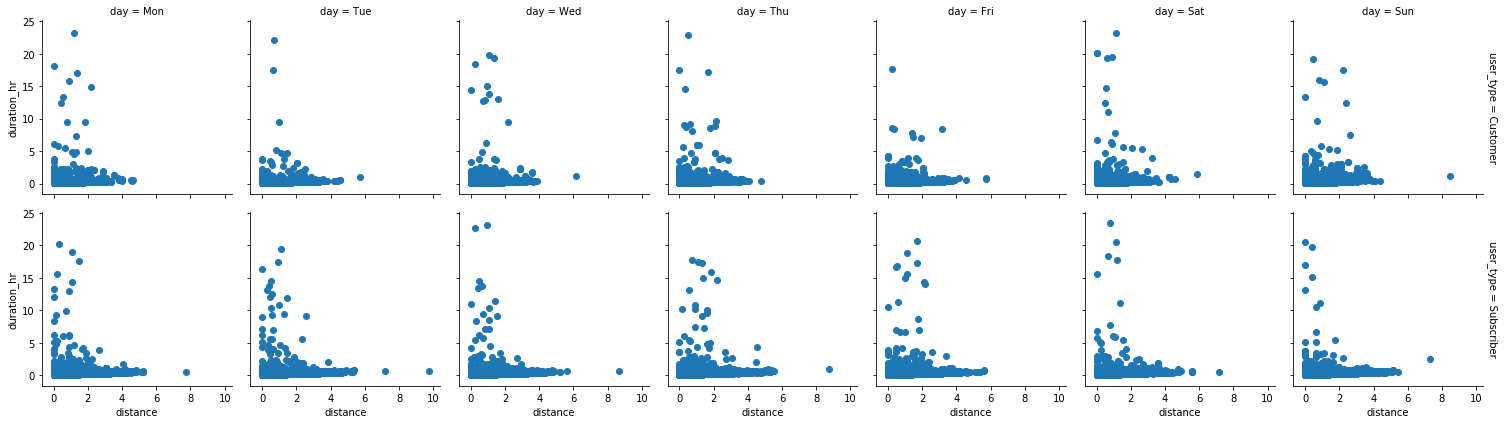

In [45]:
g = sb.FacetGrid(data = df, col = 'day', row='user_type',  margin_titles = True);
g.map(plt.scatter, "distance","duration_hr");

This graph shows a scatter plot for duration and distance for different members type (customer VS subscribers) through the weekdays

### What is the relation between distance and duration for genders types in each day of the week?

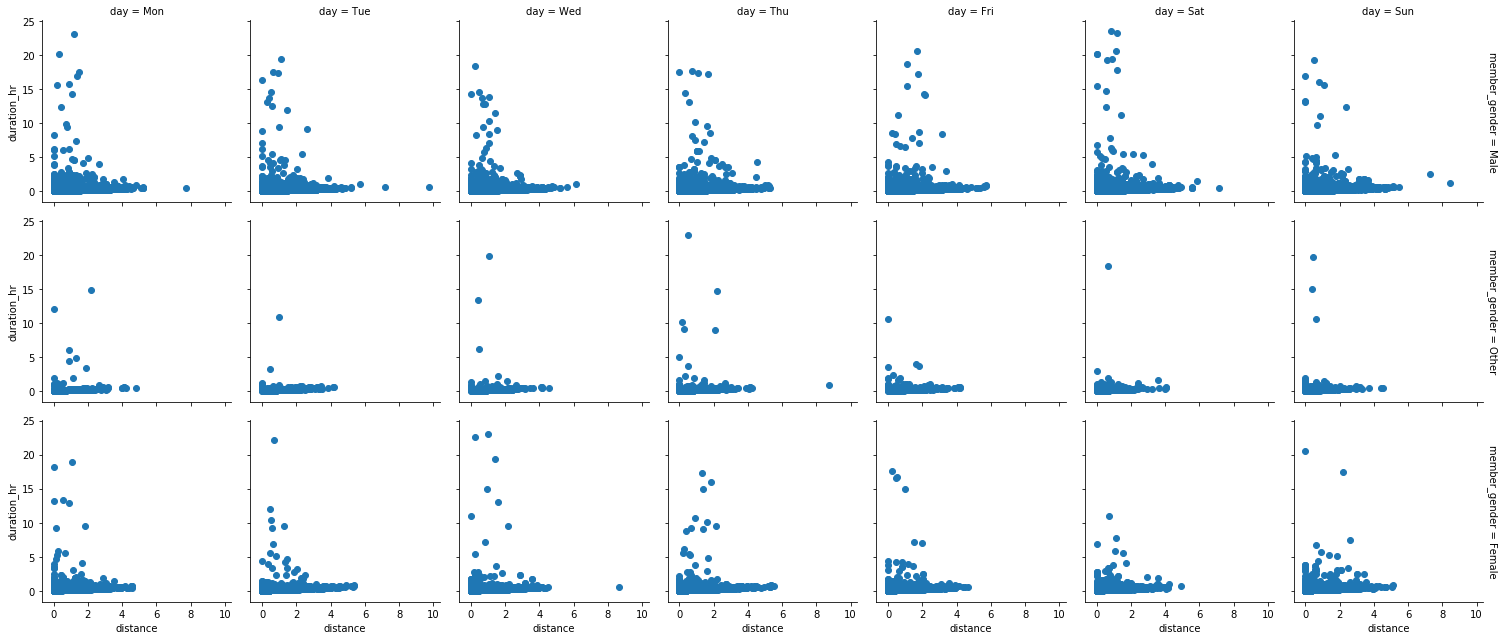

In [46]:
g = sb.FacetGrid(data = df, col = 'day', row='member_gender',  margin_titles = True);
g.map(plt.scatter, "distance","duration_hr");

This graph shows a scatter plot for duration and distance for different gender types (customer VS subscribers) through the weekdays which clearly shows that males used to share bikes more often

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
I extended my investigation of the data using at the impact of age, gender, day of the week, duration, and distination in respect to member type (subscriber or customer) The multivariate exploration here showed high bike-sharing activity fot males than other genders, and a simillar relation between duration and distance per each gender type. the bivirate showed a lower bike-sharing activity per each weekends. but it doesn't seem like there's a systematic interaction effect between duration and distance. 


### Were there any interesting or surprising interactions between features?
Looking back on the scatter plots, it doesn't seem like there's a systematic interaction effect between duration and distince. However, the features also aren't fully independent. But it is interesting in something like the bike-sharing activity decline in the weekends. and females share bikes less often than males I also noticed that younger generations use share-bike less often than the generations between the ages of 30 and 60.